<a href="https://colab.research.google.com/github/DharmendraYadav96/Resume-Screening-App/blob/main/Resume_Screening_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resume Screening App**


### Project summary

## **1. Know your dataset**

#### Importing libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn

#### Dataset loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Dataset/UpdatedResumeDataSet.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#### Check null values

In [5]:
df.isnull().sum()

,0
Category,0
Resume,0


#### Exploring Categories

In [6]:
print(df['Category'].unique())
print("No. of unique values", df['Category'].nunique())
df['Category'].value_counts()

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
No. of unique values 25


,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


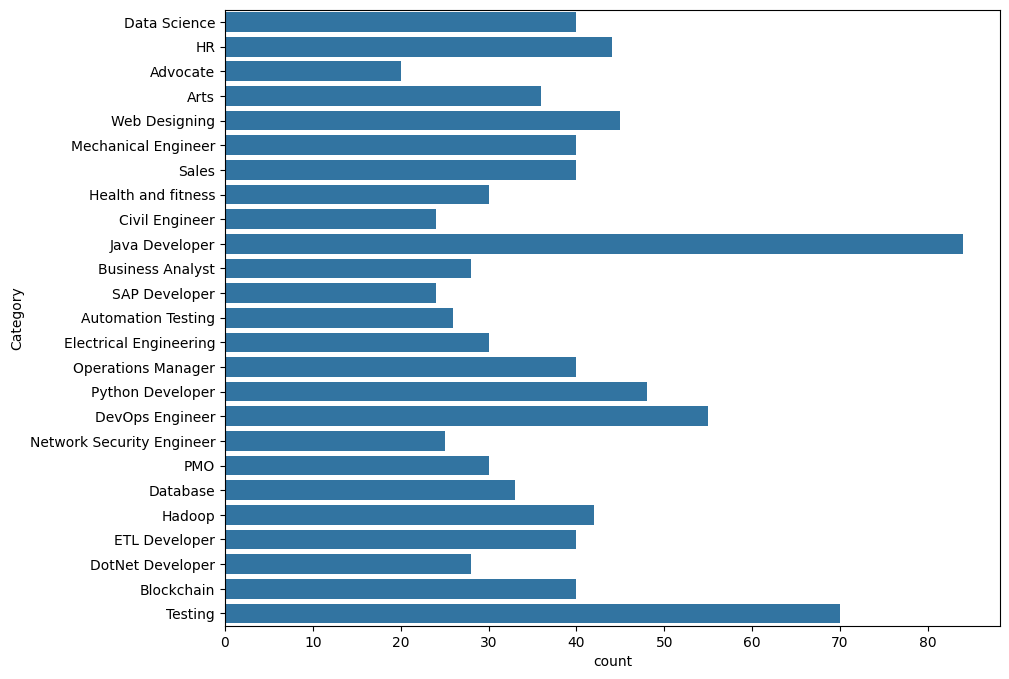

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(df['Category'])
plt.show()

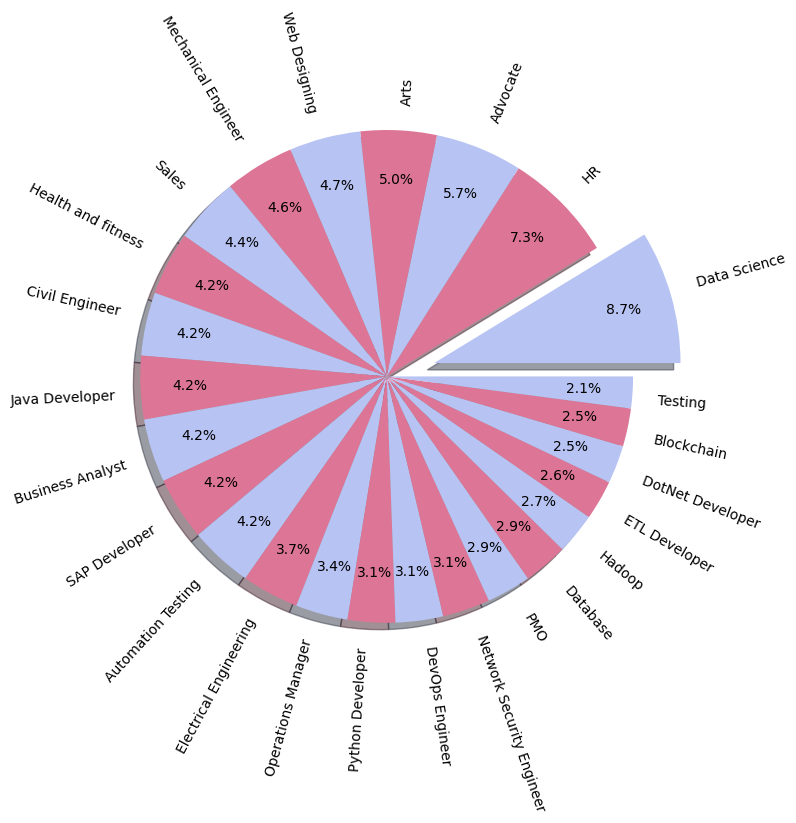

In [8]:
plt.figure(figsize=(8,8))
count = df['Category'].value_counts()
labels = df['Category'].unique()
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(count, labels=labels, explode = explode, shadow = True, autopct = '%1.1f%%', pctdistance=0.8, rotatelabels = True, colors=['#B7C3F3','#DD7596'])
plt.show()

In [9]:
df['Resume'][3]

"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

## **2. Feature Engineering**

#### **2.1 Textual Data Preprocessing**

1. Remove URL, emails, RT | CC
2. Remove punctuaitons
3. Remove hashtags

In [10]:
import nltk
import re

stop_words = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def textprep(txt):
  cleantext = re.sub('http\S+\s', '', txt)
  cleantext = re.sub('#\S+\s', '', cleantext)
  cleantext = re.sub('RT|cc', '', cleantext)
  cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleantext)
  cleantext = re.sub(r'[^\x00-\x7f]', ' ', cleantext)
  cleantext = re.sub('\d+', ' ', cleantext)
  cleantext = re.sub('\s+', ' ', cleantext)
  return cleantext


In [12]:
df['Resume'] = df['Resume'].apply(textprep)

In [13]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in aelerating the review proces

In [14]:
# def remove_stopwords(txt):
#   cleantext = [word.lower() for word in txt.split() if word.lower() not in stop_words]
#   return " ".join(cleantext)

# def remove_stopwords_new(txt):
#     if isinstance(txt, str):  # Ensure the input is a string
#         cleantext = [word.lower() for word in txt.split() if word.lower() not in stop_words]
#         return " ".join(cleantext)
#     else:
#         return ""

# df['Resume'] = df['Resume'].apply(remove_stopwords)
# df['Resume'] = df['Resume'].apply(remove_stopwords_new)

TypeError: argument of type 'bool' is not iterable

#### **2.2 Converting words into categorical values**

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [16]:
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

#### **2.3 Vectorisation**

In [17]:
tfidf = TfidfVectorizer(stop_words='english')
vectorised_text  = tfidf.fit_transform(df['Resume'])


In [ ]:
df['Category']

#### **2.4 Train test split**

In [18]:
X = vectorised_text
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 7049)
(193, 7049)
(769,)
(193,)


## **Machine Learning**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

## **Challenges faced:**

1. Not able to remove stopwords.
2. Balanced and unbalanced dataset not checked